Collect all data

In [1]:
import pandas as pd
dfs = []
dfs.append(pd.read_csv('../results/17824621.csv'))
dfs.append(pd.read_csv('../results/17827845.csv'))
dfs.append(pd.read_csv('../results/17827850.csv'))
dfs.append(pd.read_csv('../results/17827855.csv'))
dfs.append(pd.read_csv('../results/17827870.csv'))
data = pd.concat(dfs)
data

,fold,n_components,error,walltime,cputime
0,1,1,38.83,00:12:05,00:54:23
1,1,1,40.65,00:12:05,00:54:23
2,1,1,40.24,00:12:05,00:54:23
3,1,1,38.77,00:12:05,00:54:23
4,1,1,39.13,00:12:05,00:54:23
...,...,...,...,...,...
24,1,12,45.40,NaN,NaN
25,1,12,47.42,NaN,NaN
26,1,12,46.92,NaN,NaN
27,1,12,46.01,NaN,NaN


Convert wall- and cputime to minutes.

Note walltime is total time spend to compute all folds, whilst cpu time is total **accumulated** time spent by each individual fold on training and testing the model.

In [2]:
def to_minutes(duration):
    '''converts duration to minutes.
    e.g. "00:54:23"   to 54.38 min
    e.g. "1-00:00:00" to 1440.00 min (= 1 day)'''
    days = duration.str.extract(r'(\d)-.*', expand=False)
    days = pd.to_numeric(days)
    timestamp = duration.str.replace(r'\d-', '')
    minutes = timestamp.apply(lambda x: pd.Timedelta(x).total_seconds() / 60)
    return minutes + days.fillna(0) * 24 * 60

data['walltime (minutes)'] = to_minutes(data['walltime'])
data['cputime (minutes)'] = to_minutes(data['cputime'])

Plot `n_components` versus error rate

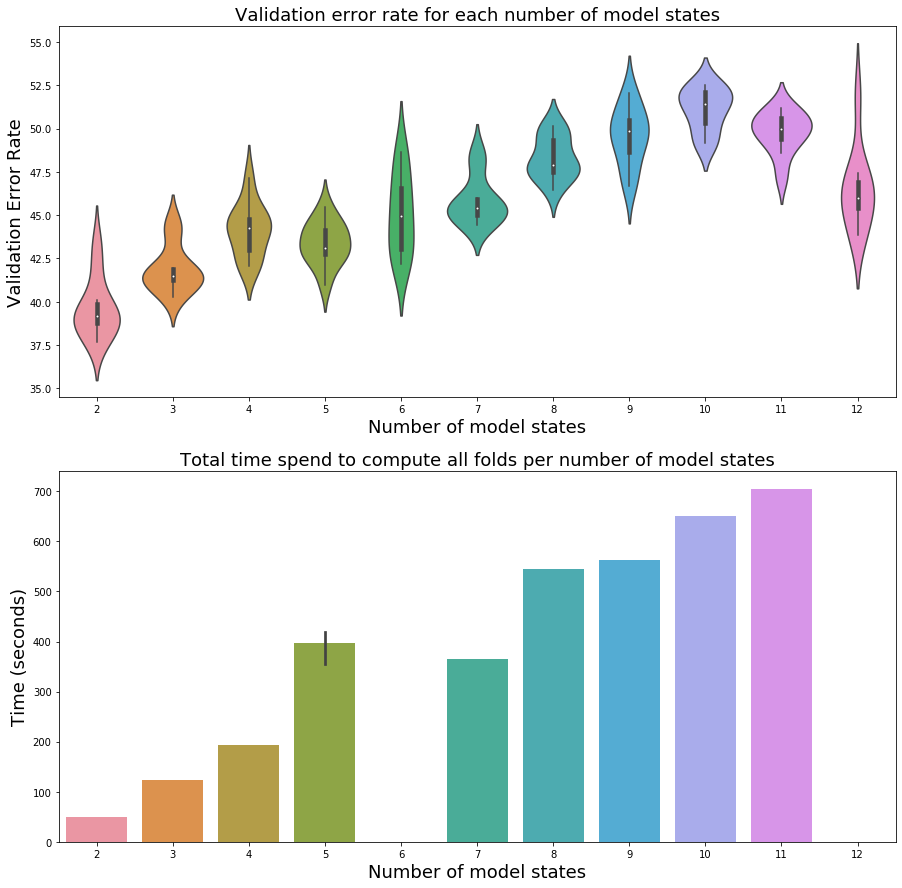

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(15,15))
sns.violinplot(data=data.loc[data.n_components > 1], x='n_components', y='error', ax=ax0)
ax0.set_title('Validation error rate for each number of model states', fontsize=18)
ax0.set_xlabel("Number of model states", fontsize=18)
ax0.set_ylabel("Validation Error Rate", fontsize=18)

sns.barplot(data=data.loc[data.n_components > 1], x='n_components', y='walltime (minutes)', ax=ax1)
ax1.set_title('Total time spend to compute all folds per number of model states', fontsize=18)
ax1.set_xlabel("Number of model states", fontsize=18)
ax1.set_ylabel("Time (seconds)", fontsize=18)

# fig.suptitle("Test error and walltime for each number of model states", fontsize=14)
plt.show()

Total CPU time spent

In [113]:
f"{data['cputime (minutes)'].sum()/60} hours spent computing on a CPU"

'5704.2427777777775 hours spent computing on a CPU'

In [42]:
hmm_method = data.loc[data.n_components == 2].error
naive_method = [47.83, 46.01, 44.99, 46.81, 46.61, 46.11, 46.96, 42.71, 45.55, 44.64]

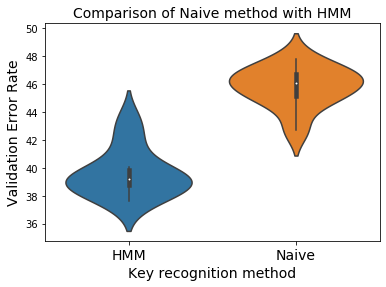

In [54]:
sns.violinplot(data=[hmm_method, naive_method])
plt.xlabel("Key recognition method", fontsize=14)
plt.ylabel("Validation Error Rate", fontsize=14)
plt.xticks([0, 1], labels=["HMM", "Naive"], fontsize=14)
plt.title("Comparison of Naive method with HMM", fontsize=14)
plt.show()